# MLMI: OCT Image Generation with Diffusion Models
## Exploring Experiment 1
### Goal of Notebook
> Assess training curves of experiment 1 to guide next runs.

Auto reloads custom packages (within `guided_diffusion`)

In [7]:
# Auto reload custom packages
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Imports required packages

In [23]:
import re
import pandas as pd
import seaborn as sns
from guided_diffusion.src.paths import LOGS_DATA_PATH
sns.set()

Loads log console output

In [64]:
exp_path = LOGS_DATA_PATH / 'exp_001/log.txt'
with open(exp_path) as fp:
    logs = fp.read()

Prints experiments parameters

In [83]:
dict_str = re.search('({.*})', logs[:5000].replace('\n', '')).group(0).replace('  ', ' ')
dict_str

'{  "data_dir": "./data/raw/oct_test",  "schedule_sampler": "uniform",  "lr": 0.0001,  "weight_decay": 0.0,  "lr_anneal_steps": 0,  "batch_size": 4,  "microbatch": -1,  "ema_rate": "0.9999",  "log_interval": 10,  "save_interval": 100,  "resume_checkpoint": "",  "use_fp16": false,  "fp16_scale_growth": 0.001,  "max_train_steps": 40000,  "image_size": 128,  "num_channels": 128,  "num_res_blocks": 3,  "num_heads": 4,  "num_heads_upsample": -1,  "num_head_channels": -1,  "attention_resolutions": "16,8",  "channel_mult": "",  "dropout": 0.0,  "class_cond": false,  "use_checkpoint": false,  "use_scale_shift_norm": true,  "resblock_updown": false,  "use_new_attention_order": false,  "learn_sigma": false,  "diffusion_steps": 100,  "noise_schedule": "linear",  "timestep_respacing": "",  "use_kl": false,  "predict_xstart": false,  "rescale_timesteps": false,  "rescale_learned_sigmas": false}'

Loads training log process

In [8]:
log_path = LOGS_DATA_PATH / 'exp_001/progress.csv'
df = pd.read_csv(log_path)
df

,datetime,grad_norm,loss,loss_q1,loss_q2,mse,mse_q1,mse_q2,param_norm,samples,step,unix_time,loss_q0,loss_q3,mse_q0,mse_q3
0,21/06/2022 22:40:14,3.627170,1.004376,1.002982,1.008560,1.004376,1.002982,1.008560,234.515781,4,0,1.655844e+09,NaN,NaN,NaN,NaN
1,21/06/2022 22:40:38,3.362839,0.901960,0.888441,0.880572,0.901960,0.888441,0.880572,234.517505,44,10,1.655844e+09,0.961967,0.918177,0.961967,0.918177
2,21/06/2022 22:40:40,3.043626,0.707084,0.720272,0.680757,0.707084,0.720272,0.680757,234.523670,84,20,1.655844e+09,0.707251,0.721888,0.707251,0.721888
3,21/06/2022 22:40:43,2.669751,0.557725,0.521676,0.513066,0.557725,0.521676,0.513066,234.533109,124,30,1.655844e+09,0.649954,0.528688,0.649954,0.528688
4,21/06/2022 22:40:46,2.377275,0.404383,0.379751,0.383901,0.404383,0.379751,0.383901,234.549486,164,40,1.655844e+09,0.462087,0.385784,0.462087,0.385784
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,22/06/2022 04:18:07,0.038075,0.000540,0.000485,0.000215,0.000540,0.000485,0.000215,255.375817,159804,39950,1.655864e+09,0.001815,0.000101,0.001815,0.000101
3996,22/06/2022 04:18:10,0.052803,0.003127,0.000488,0.000215,0.003127,0.000488,0.000215,255.378737,159844,39960,1.655864e+09,0.009729,0.000199,0.009729,0.000199
3997,22/06/2022 04:18:12,0.038551,0.001826,0.000529,0.000252,0.001826,0.000529,0.000252,255.384483,159884,39970,1.655864e+09,0.008054,0.000101,0.008054,0.000101
3998,22/06/2022 04:18:15,0.050730,0.001981,0.000543,0.000252,0.001981,0.000543,0.000252,255.388947,159924,39980,1.655864e+09,0.008605,0.000134,0.008605,0.000134


Creates elapsed time features

In [32]:
df['elapsed_s'] = df.unix_time - df.unix_time.min()
df['elapsed_m'] = df['elapsed_s'] / 60
df['elapsed_h'] = df['elapsed_m'] / 60
df

,datetime,grad_norm,loss,loss_q1,loss_q2,mse,mse_q1,mse_q2,param_norm,samples,step,unix_time,loss_q0,loss_q3,mse_q0,mse_q3,elapsed_time,elapsed_s,elapsed_m,elapsed_h
0,21/06/2022 22:40:14,3.627170,1.004376,1.002982,1.008560,1.004376,1.002982,1.008560,234.515781,4,0,1.655844e+09,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000
1,21/06/2022 22:40:38,3.362839,0.901960,0.888441,0.880572,0.901960,0.888441,0.880572,234.517505,44,10,1.655844e+09,0.961967,0.918177,0.961967,0.918177,23.487043,23.487043,0.391451,0.006524
2,21/06/2022 22:40:40,3.043626,0.707084,0.720272,0.680757,0.707084,0.720272,0.680757,234.523670,84,20,1.655844e+09,0.707251,0.721888,0.707251,0.721888,26.083123,26.083123,0.434719,0.007245
3,21/06/2022 22:40:43,2.669751,0.557725,0.521676,0.513066,0.557725,0.521676,0.513066,234.533109,124,30,1.655844e+09,0.649954,0.528688,0.649954,0.528688,29.173348,29.173348,0.486222,0.008104
4,21/06/2022 22:40:46,2.377275,0.404383,0.379751,0.383901,0.404383,0.379751,0.383901,234.549486,164,40,1.655844e+09,0.462087,0.385784,0.462087,0.385784,32.056792,32.056792,0.534280,0.008905
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,22/06/2022 04:18:07,0.038075,0.000540,0.000485,0.000215,0.000540,0.000485,0.000215,255.375817,159804,39950,1.655864e+09,0.001815,0.000101,0.001815,0.000101,20272.999406,20272.999406,337.883323,5.631389
3996,22/06/2022 04:18:10,0.052803,0.003127,0.000488,0.000215,0.003127,0.000488,0.000215,255.378737,159844,39960,1.655864e+09,0.009729,0.000199,0.009729,0.000199,20275.597814,20275.597814,337.926630,5.632111
3997,22/06/2022 04:18:12,0.038551,0.001826,0.000529,0.000252,0.001826,0.000529,0.000252,255.384483,159884,39970,1.655864e+09,0.008054,0.000101,0.008054,0.000101,20277.884330,20277.884330,337.964739,5.632746
3998,22/06/2022 04:18:15,0.050730,0.001981,0.000543,0.000252,0.001981,0.000543,0.000252,255.388947,159924,39980,1.655864e+09,0.008605,0.000134,0.008605,0.000134,20280.691532,20280.691532,338.011526,5.633525


Plots training curves
1. Over Iteration Steps

<AxesSubplot:xlabel='step'>

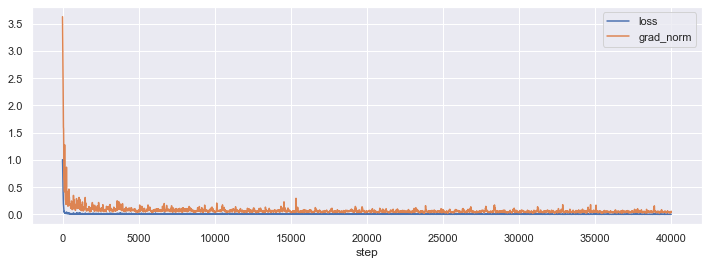

In [96]:
df.plot(kind='line', x='step', y=['loss', 'grad_norm'], logy=False, figsize=(12,4))

In log scale

<AxesSubplot:xlabel='step'>

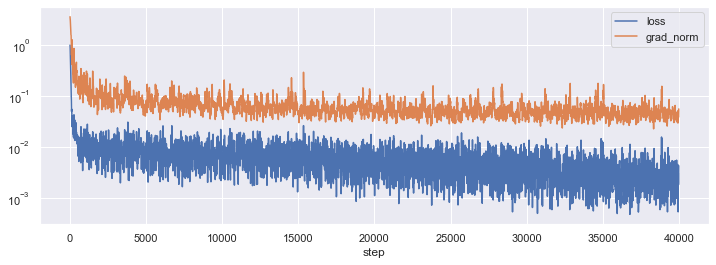

In [89]:
df.plot(kind='line', x='step', y=['loss', 'grad_norm'], logy=True, figsize=(12,4))

3. Over elapsed time

<AxesSubplot:xlabel='elapsed_h'>

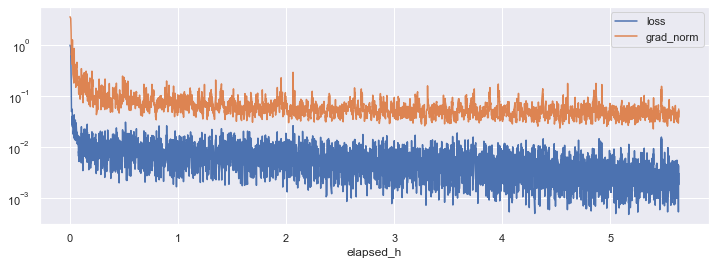

In [90]:
df.plot(kind='line', x='elapsed_h', y=['loss', 'grad_norm'], logy=True, figsize=(12,4))

Conclusion
> Overfit occured around 1,500th iteration, during the first minutes of training. After that training loss slowly went down. Cluster environment is validated and its possible to proceed.